In [1]:
import torch 
import json 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
plat_groups = pd.read_excel("/mnt/ncshare/ozkilim/BRCA/data/HGSOC_processed_data/plat_res_prots.xlsx",header=2)
upreg = plat_groups[plat_groups["Up / down in Pt-resistant cellsc"]=="UP"]
downreg = plat_groups[plat_groups["Up / down in Pt-resistant cellsc"]=="DOWN"]
down_reg_prots = downreg["HUGO Gene symbol"].to_list()
up_reg_prots = upreg["HUGO Gene symbol"].to_list()

with open("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/proteomics_combinations.json", 'r') as file:
	protein_sets = json.load(file)

protein_categories = protein_sets['plat_response_pathways']
igs = torch.load("/mnt/ncshare/ozkilim/BRCA/heatmaps/plat_responce_heatmaps/heatmap_raw_results/HGSOC_MCAT_Mayo_plat_resp_clusters/Unspecified/1009816_271289_ImageActual/attributions_ig.pt")
igs=igs[1:]

dict_keys(['Apoptotic signaling', 'DDR', 'p53 signaling', 'Platinum efflux', 'PKA signaling', 'Oncogene signaling', 'Metabolism/Lipid', 'Metabolism/OXPHOS', 'Transcription/Epigenetics', 'ECM/stroma', 'ECM signaling', 'EMT', 'WNT signaling', 'NF-kB signaling', 'Notch signaling', 'Immune response', 'Detox', 'Apoptosis', 'Redox', 'AMPK signaling', 'mTOR signaling', 'CSC', 'Metabolism/Glycolysis', 'Cell cycle', 'DDR/direct repair', 'Autophagy', 'Oncogene signaling/MAPK', 'Calcium signaling', 'DDR/BER', 'Translation', 'Redox/Glutathione', 'Hypoxia signaling', 'DDR/nucleotide synthesis', 'Metabolism/amino acid', 'Oncogene signaling/PKG', 'Platinum uptake', 'pH/Pt-toxicity', 'Oncogene signaling/AKT', 'ubiquitin', 'DDR/HR', 'MYC signaling', 'DDR/NER', 'ER stress response', 'TGF-β signaling', 'Chaperone', 'Hippo signaling', 'Transcription', 'DDR/DNA replication', 'vesicle trafficking', 'Hormone receptor signaling', 'Oncogene signaling/EGFR', 'Metabolism/One carbon', 'RNA processing', 'Apoptotic

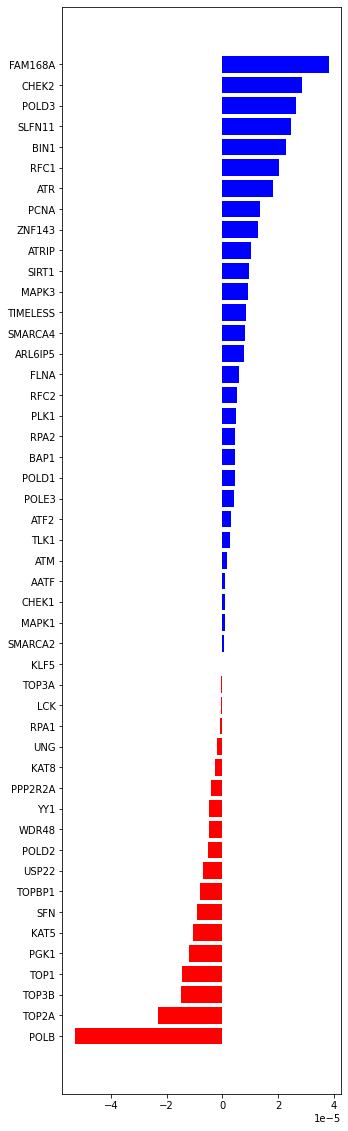

In [3]:
igs[0].shape

print(protein_categories.keys())
key_name = "DDR"
index = list(protein_categories.keys()).index(key_name)
print(index)
fig = plt.figure(figsize=(5, 20))

first = igs[index]
first_prots = list(protein_categories.values())[index]
# sort : 
sorted_indices = np.argsort(first.cpu())
sorted_strings = np.array(first_prots)[sorted_indices]
sorted_values = first[sorted_indices]
# Plotting each bar individually to assign colors
for i in range(len(sorted_strings)):
    color = 'blue' if sorted_values[i] > 0 else 'red'
    plt.barh(sorted_strings[i], sorted_values[i], color=color)

In [4]:
# load 
plat_groups = pd.read_excel("/mnt/ncshare/ozkilim/BRCA/data/HGSOC_processed_data/plat_res_prots.xlsx",header=2)
upreg = plat_groups[plat_groups["Up / down in Pt-resistant cellsc"]=="UP"]
downreg = plat_groups[plat_groups["Up / down in Pt-resistant cellsc"]=="DOWN"]
down_reg_prots = downreg["HUGO Gene symbol"].to_list()
up_reg_prots = upreg["HUGO Gene symbol"].to_list()

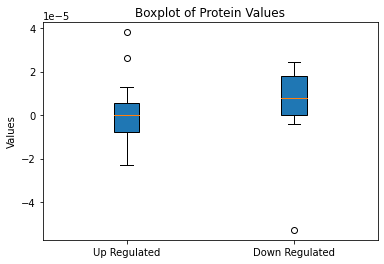

In [5]:
# Now find these prots in the igs... link first to names of prots... 

# do over all groups....
sorted_strings
sorted_values

# Splitting the sorted_values into two lists based on up/down regulation
values_up_reg = [value.cpu().numpy() for prot, value in zip(sorted_strings, sorted_values) if prot in up_reg_prots]
values_down_reg = [value.cpu().numpy() for prot, value in zip(sorted_strings, sorted_values) if prot in down_reg_prots]

# Plotting
fig, ax = plt.subplots()
ax.boxplot([values_up_reg, values_down_reg], labels=['Up Regulated', 'Down Regulated'], patch_artist=True)

# Customizations
plt.title('Boxplot of Protein Values')
plt.ylabel('Values')
plt.grid(False)  # Optionally hide the grid for a cleaner look.

plt.show()

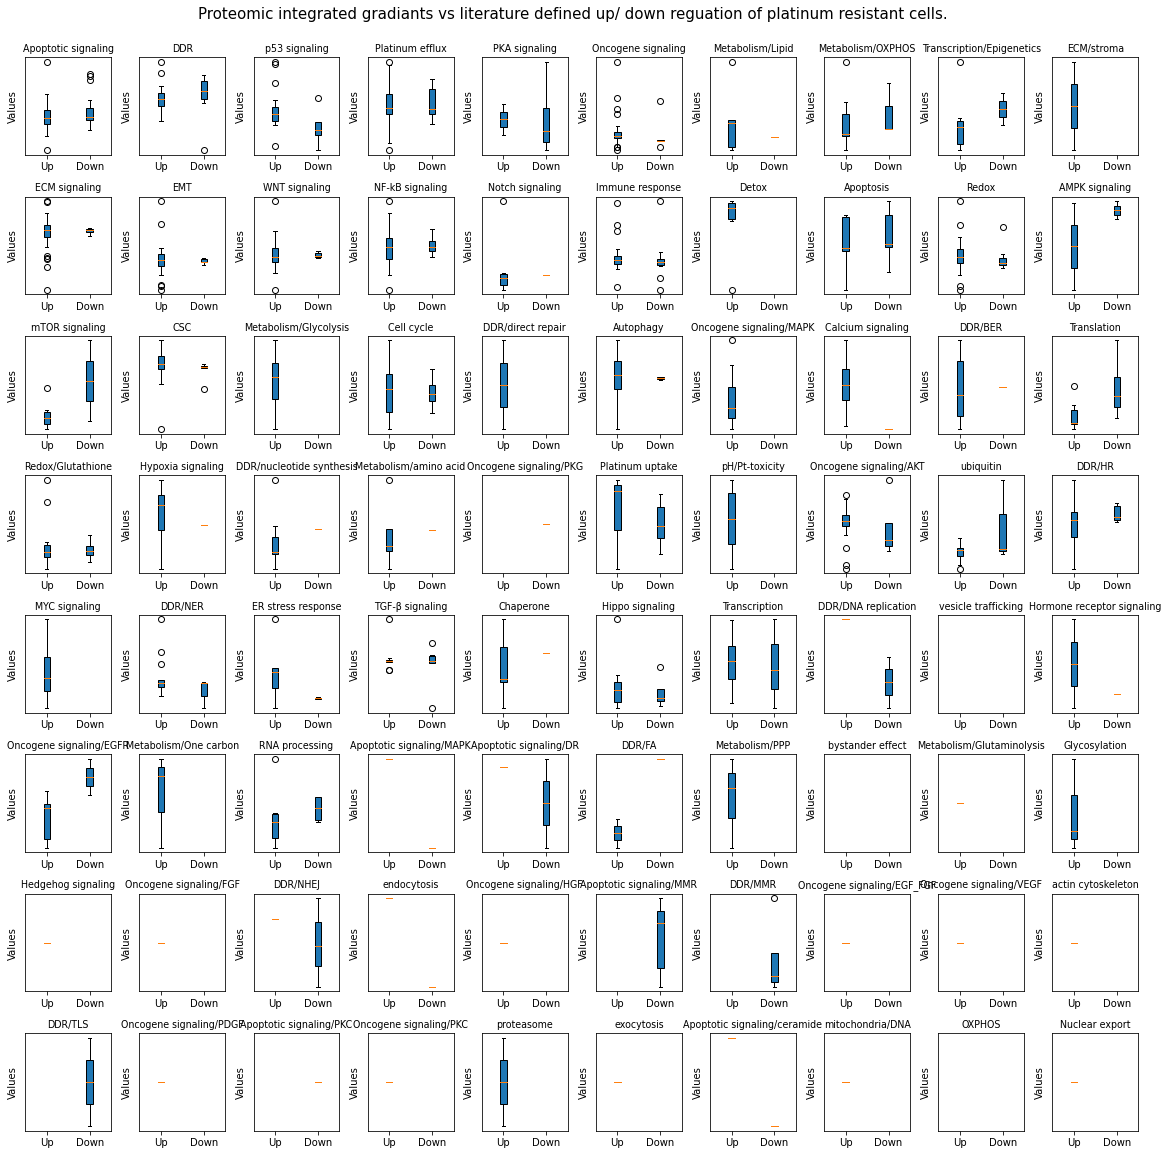

In [14]:
import matplotlib.pyplot as plt

# Initialize a figure with 8 rows and 10 columns
fig, axs = plt.subplots(8, 10, figsize=(16, 16))
all_values = []
all_names = []
for i in range(len(igs)):
    values = igs[i]
    names = list(protein_categories.values())[i]
    pathways = list(protein_categories.keys())[i]

    all_values.append(values.cpu().numpy())
    all_names.append(names)
    # make larger list .... 

    values_up_reg = [value for prot, value in zip(names, values.cpu().numpy()) if prot in up_reg_prots]
    values_down_reg = [value for prot, value in zip(names, values.cpu().numpy()) if prot in down_reg_prots]

    # Calculate subplot index
    row = i // 10  # Row index
    col = i % 10    # Column index

    # Plot on the corresponding subplot
    axs[row, col].boxplot([values_up_reg, values_down_reg], labels=['Up', 'Down'], patch_artist=True)

    # Customizations
    axs[row, col].set_title(pathways,fontsize=9.5)
    axs[row, col].set_ylabel('Values')
    axs[row, col].grid(False)  # Optionally hide the grid for a cleaner look
    ax.set_ylim([-0.0004, -0.0006])
    axs[row, col].set_yticks([])

plt.suptitle("Proteomic integrated gradiants vs literature defined up/ down reguation of platinum resistant cells.", y=1, fontsize=15)  # Adjust layout to prevent overlap of subplots
plt.tight_layout()  # Adjust layout to prevent overlap of subplots
output_file = "/mnt/ncshare/ozkilim/BRCA/figures/IG_proteins_vs_lit.png"
plt.savefig(output_file, bbox_inches='tight', dpi=300, facecolor=fig.get_facecolor())  # Save with high resolution
plt.show()

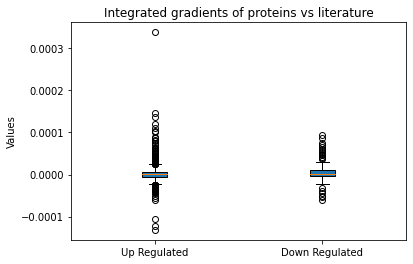

In [7]:
# # loop over all and create one giant list ....
all_names = [item for sublist in all_names for item in sublist]
all_values = [item for sublist in all_values for item in sublist]

# Splitting the sorted_values into two lists based on up/down regulation
values_up_reg = [value for prot, value in zip(all_names, all_values) if prot in up_reg_prots]
values_down_reg = [value for prot, value in zip(all_names, all_values) if prot in down_reg_prots]

# Plotting
fig, ax = plt.subplots()
ax.boxplot([values_up_reg, values_down_reg], labels=['Up Regulated', 'Down Regulated'], patch_artist=True)

# Customizations
plt.title('Integrated gradients of proteins vs literature')
plt.ylabel('Values')
plt.grid(False)  # Optionally hide the grid for a cleaner look
plt.show()